#### This notebook presents key visualizations that summarize the main insights discovered during the EDA process. These visuals are intended to support decision-making at ACIS by highlighting important patterns in claim behavior, risk, and customer profiles.

# Load data

In [1]:
import sys
sys.path.append("../../")
from src.config import RAW_DATA_PATH
from src.data_loader import load_raw_data

In [2]:
df = load_raw_data(RAW_DATA_PATH)

c:\Users\user\OneDrive\Documents\Data Science\insurance-risk-modeling\notebooks\task_1\../..\src\data_loader.py:10: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path)


# Visual: Barplot of average loss ratio per Province, and VehicleType.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_11980\3038241407.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Province', y='LossRatio', estimator='mean', ci=None)


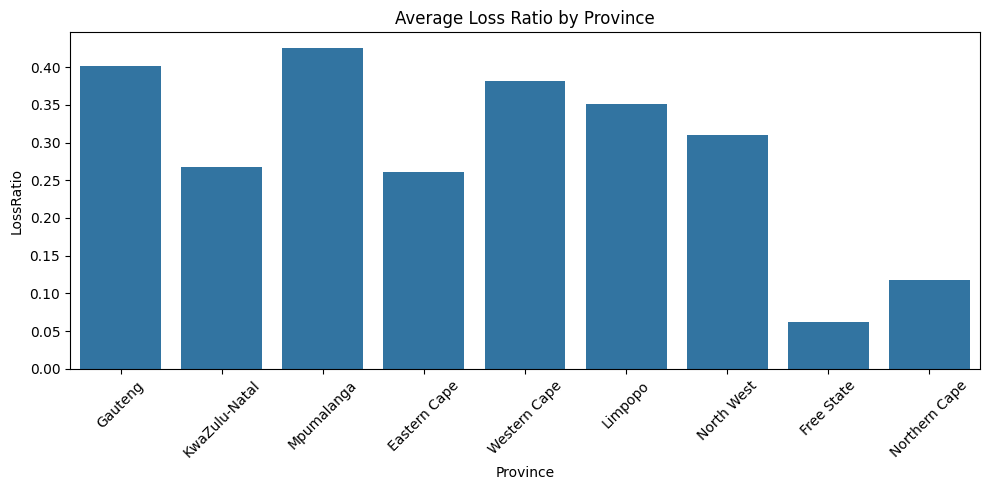

In [5]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Loss Ratio by Province
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Province', y='LossRatio', estimator='mean', ci=None)
plt.title("Average Loss Ratio by Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_11980\227640980.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='VehicleType', y='LossRatio', estimator='mean', ci=None)


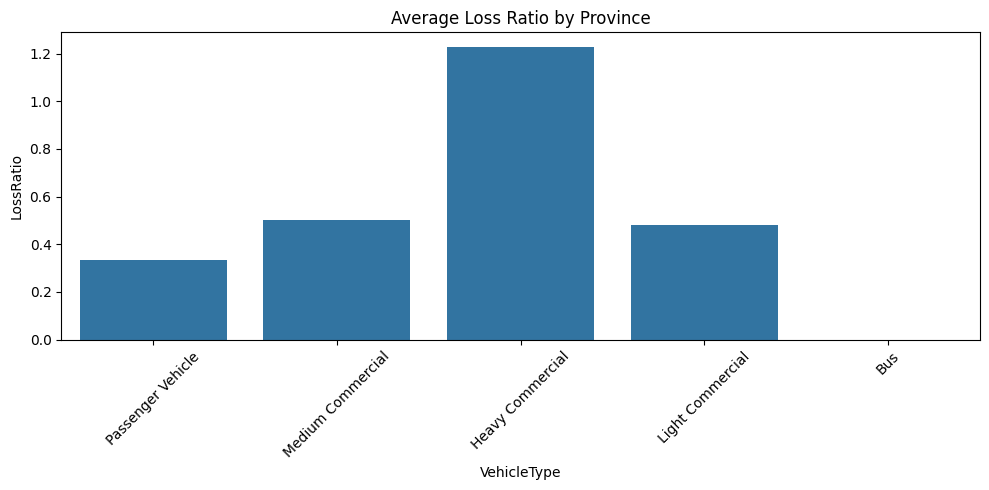

In [6]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']

# Loss Ratio by Vehicle Type
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='VehicleType', y='LossRatio', estimator='mean', ci=None)
plt.title("Average Loss Ratio by Province")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Top Vehicle Models by Claim Amount

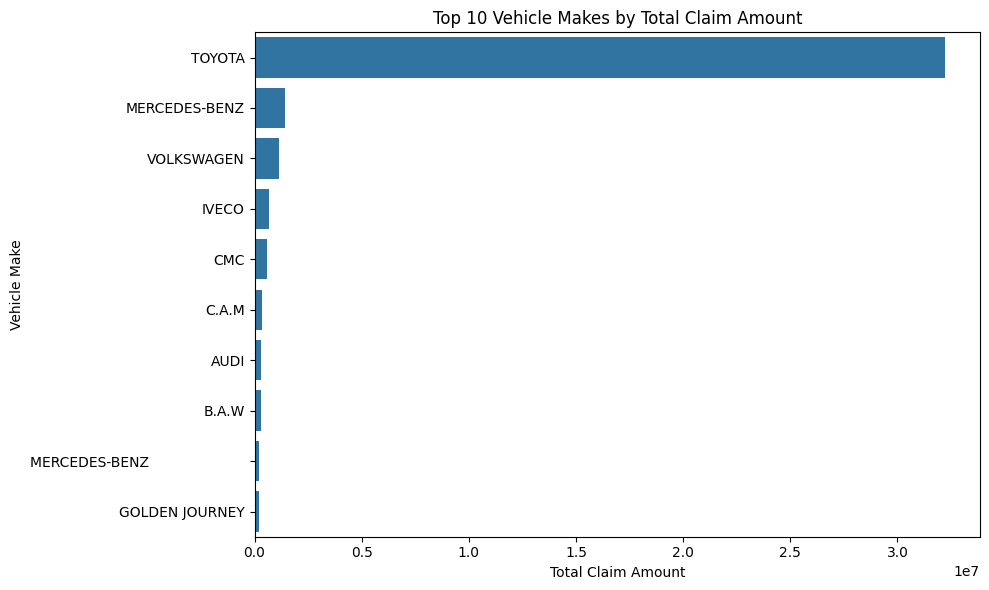

In [7]:
top_makes = df.groupby('make')['TotalClaims'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_makes.values, y=top_makes.index)
plt.title("Top 10 Vehicle Makes by Total Claim Amount")
plt.xlabel("Total Claim Amount")
plt.ylabel("Vehicle Make")
plt.tight_layout()
plt.show()


# Trend Over Time

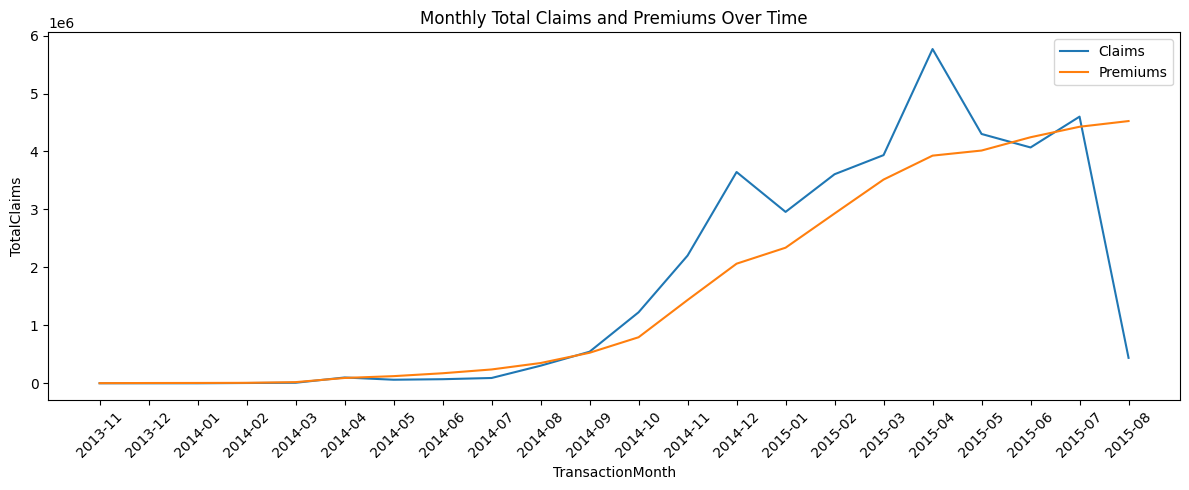

In [9]:
import pandas as pd
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
monthly = df.groupby(df['TransactionMonth'].dt.to_period('M')).agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum'
}).reset_index()

monthly['TransactionMonth'] = monthly['TransactionMonth'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly, x='TransactionMonth', y='TotalClaims', label='Claims')
sns.lineplot(data=monthly, x='TransactionMonth', y='TotalPremium', label='Premiums')
plt.title("Monthly Total Claims and Premiums Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Custom Value Estimate vs. Claim Amount

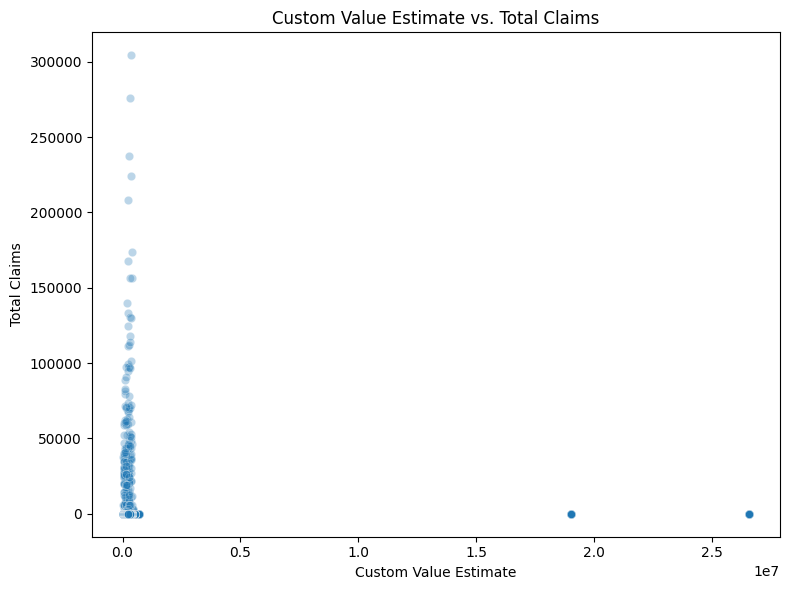

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CustomValueEstimate', y='TotalClaims', alpha=0.3)
plt.title("Custom Value Estimate vs. Total Claims")
plt.xlabel("Custom Value Estimate")
plt.ylabel("Total Claims")
plt.tight_layout()
plt.show()


# summary

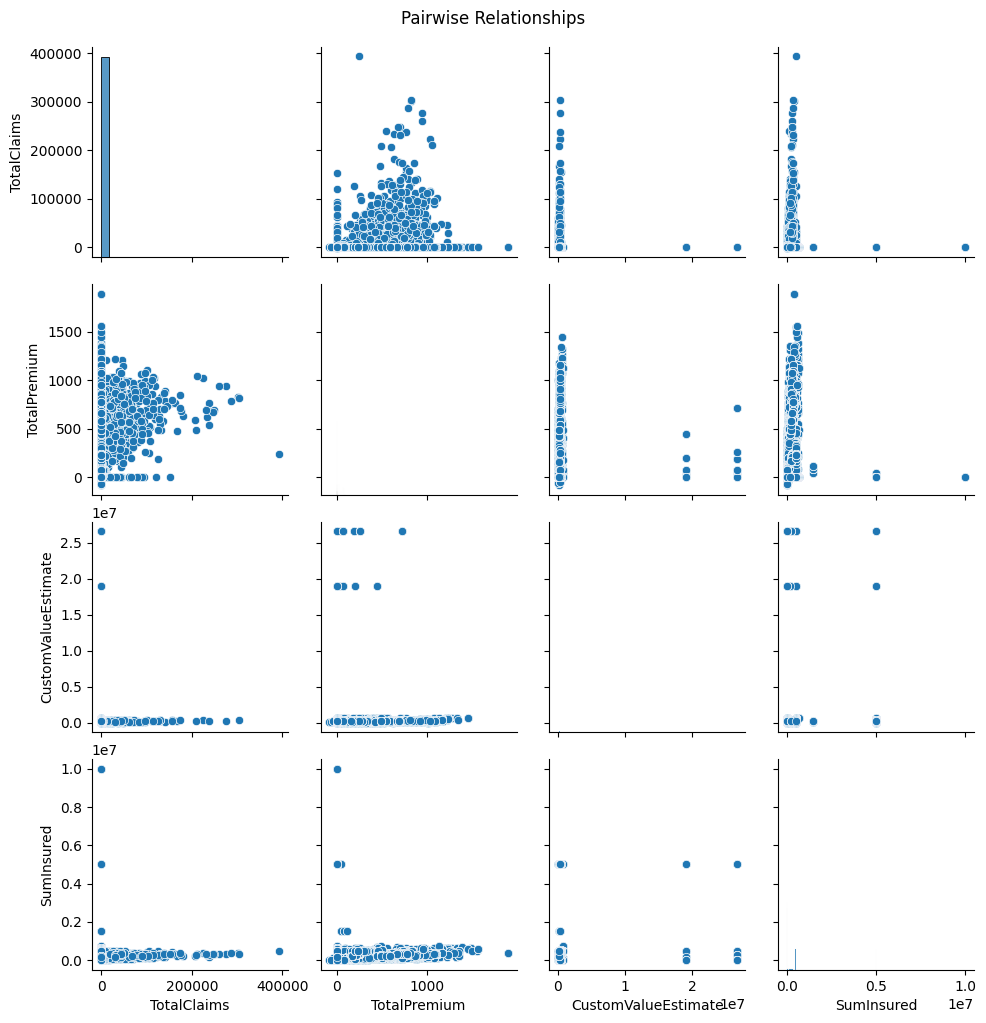

In [11]:
# Pair plot
sns.pairplot(df[['TotalClaims', 'TotalPremium', 'CustomValueEstimate', 'SumInsured']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()